In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np 

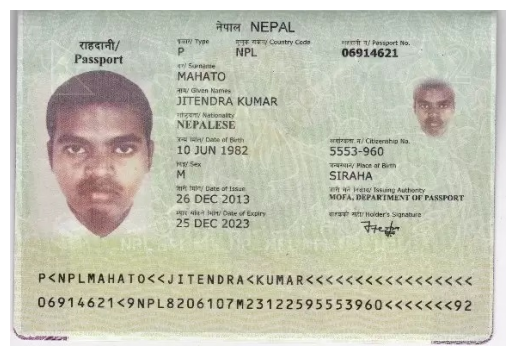

In [2]:
img = cv2.imread('E:\\Computer-Vision\OCR\\sample-photo\\nepali-passport-1.jpg')

correct_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure()
plt.imshow(correct_img)
plt.axis('off')
plt.show()


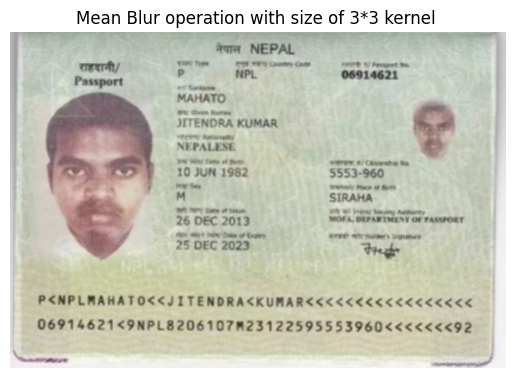

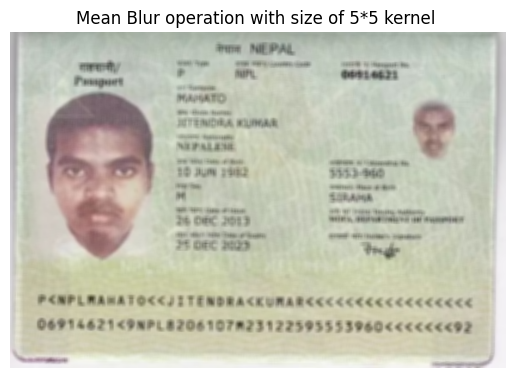

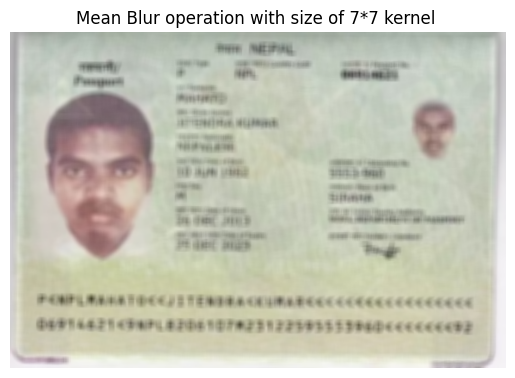

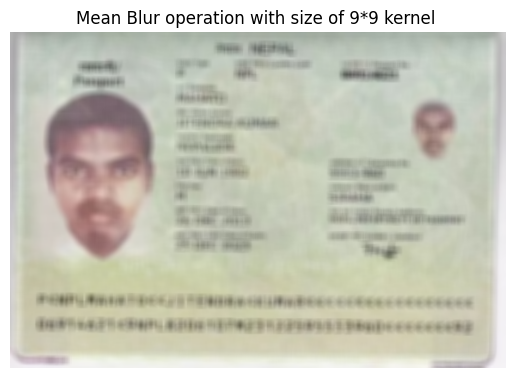

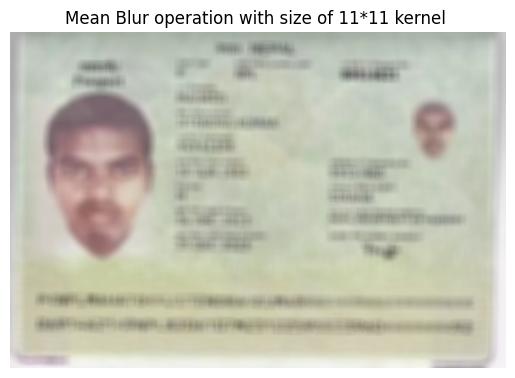

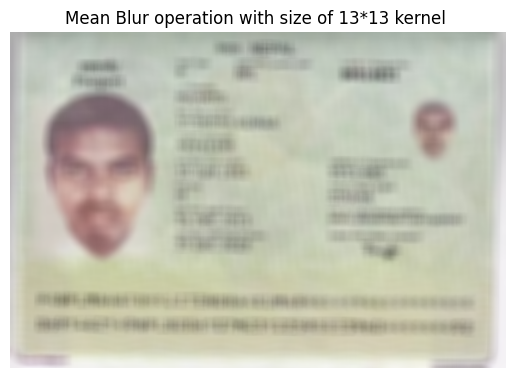

In [3]:
def meankernel(size):
    return np.ones((size, size), dtype = np.float32)/size**2

for size in range(3, 14, 2):
    blur_image = cv2.filter2D(correct_img,-1, meankernel(size))

    plt.figure()
    plt.imshow(blur_image)
    plt.title(f'Mean Blur operation with size of {size}*{size} kernel ')
    plt.axis('off')
    plt.show()


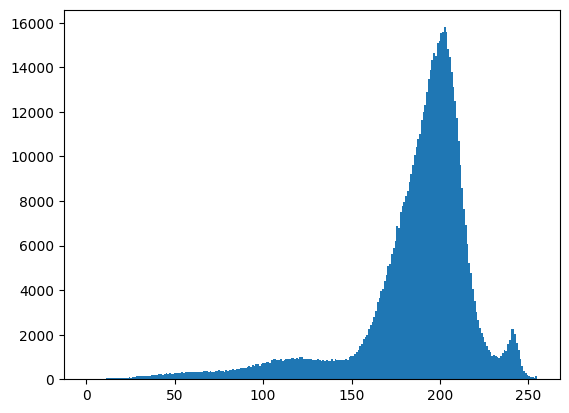

<Figure size 640x480 with 0 Axes>

In [4]:
img = cv2.imread('E:\\Computer-Vision\\OCR\\sample-photo\\nepali-passport-1.jpg')
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.hist(image.ravel(), bins = 256, range = [0, 255])
plt.figure()
plt.show()


In [5]:
img_ravel =[ image[:, :, 0].ravel(), image[:, :, 1].ravel(), image[:, :, 2].ravel()]

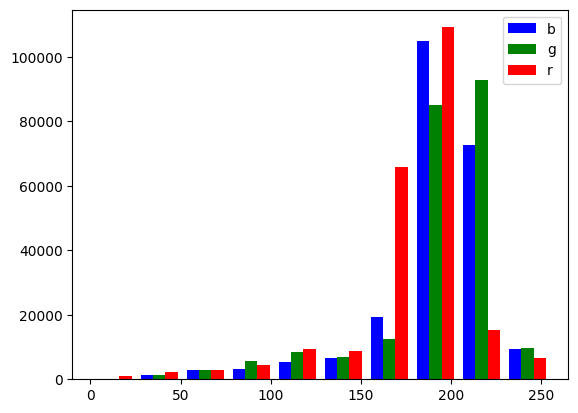

In [6]:
plt.hist(img_ravel, color= ('b', 'g', 'r'), label=('b', 'g', 'r'))
plt.legend()
plt.show()

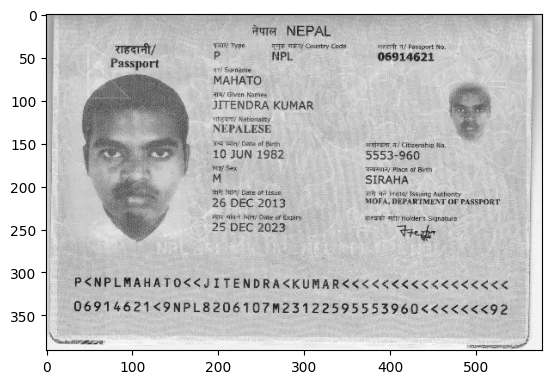

In [12]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap= 'gray')
plt.show()

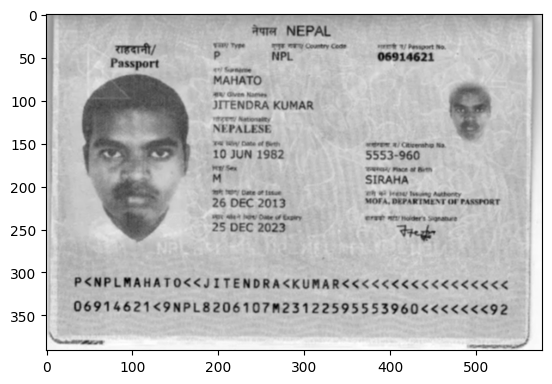

In [14]:
blur_gray_img = cv2.GaussianBlur(gray_image, (3,3), sigmaX= 0)
plt.imshow(blur_gray_img, cmap = 'gray')
plt.show()


In [26]:
t, result_image = cv2.threshold(blur_gray_img, thresh = 160, maxval = 255, type = cv2.THRESH_BINARY_INV)

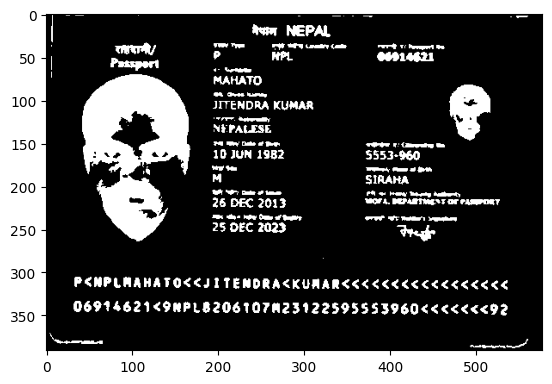

In [27]:
plt.imshow(result_image, cmap = 'gray')
plt.show()

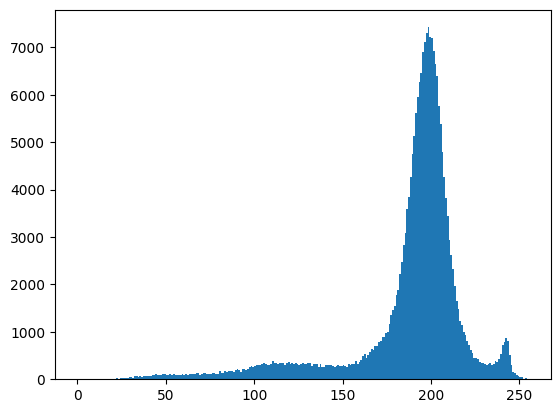

In [29]:
plt.hist(gray_image.ravel(), bins = 255, range = [0, 255])
plt.show()


In [45]:
adaptive_thres_image = cv2.adaptiveThreshold(blur_gray_img,maxValue= 255,  adaptiveMethod= cv2.ADAPTIVE_THRESH_GAUSSIAN_C, thresholdType= cv2.THRESH_BINARY_INV, blockSize=21, C = 4)

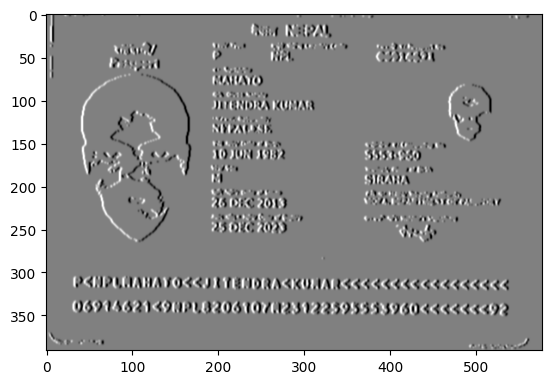

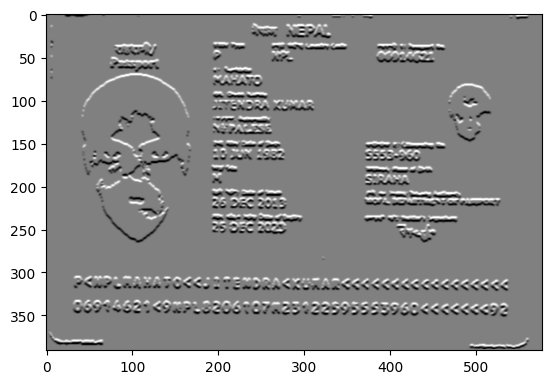

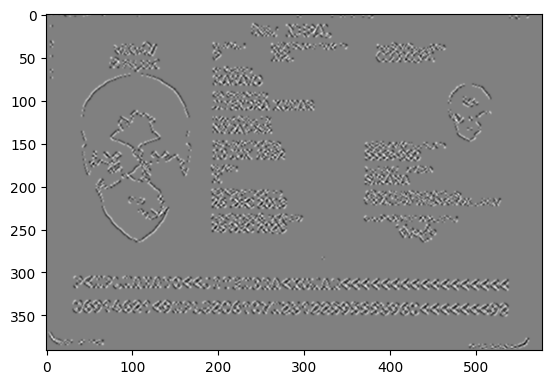

In [32]:
sobel_x = cv2.Sobel(result_image, ddepth = cv2.CV_64F, dx = 1, dy = 0, ksize= 5)
plt.imshow(sobel_x, cmap = 'gray')
plt.show()

sobel_y = cv2.Sobel(result_image, ddepth = cv2.CV_64F, dx = 0, dy = 1, ksize= 5)
plt.imshow(sobel_y, cmap = 'gray')
plt.show()

sobel_xy = cv2.Sobel(result_image, ddepth = cv2.CV_64F, dx = 1, dy = 1, ksize= 5)
plt.imshow(sobel_xy, cmap = 'gray')
plt.show()

In [37]:
canny_image = cv2.Canny(image = blur_gray_img, threshold1= 100, threshold2= 200)
cv2.imshow('edge detection',canny_image)
cv2.waitKey(0)
plt.show()

In [46]:
contours, _ = cv2.findContours(adaptive_thres_image, mode = cv2.RETR_EXTERNAL, method = cv2.CHAIN_APPROX_SIMPLE)

contours (42, 71, 126, 195)
Area 2663.5


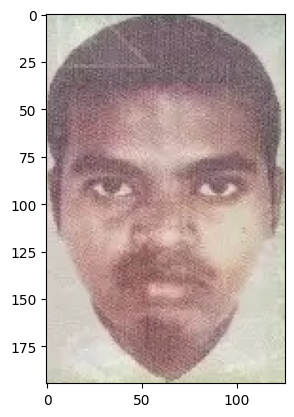

In [49]:
largest_contour = None
largest_area = 0
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > largest_area:
        largest_contour = cnt
        largest_area = area

x, y, w, h = cv2.boundingRect(largest_contour)
print("contours", (x, y, w, h))
print("Area", largest_area)
contour_id = image[y:y+h, x:x+w]
plt.imshow(contour_id)